## Most Subscribed Youtube Channels

![python logo](https://www.searchenginejournal.com/wp-content/uploads/2022/01/change-youtube-channel-name-61d6346bdc579-sej.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("youtube.csv")

In [3]:
df.head()

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799,274M,50.98B,Entertainment
1,#2,T-Series,21.12K,267M,257.16B,Music
2,#3,Cocomelon - Nursery Rhymes,1.18K,176M,182.88B,Kids
3,#4,SET India,138.97K,173M,164.71B,Entertainment
4,#5,✿ Kids Diana Show,1.22K,123M,103.5B,Kids


In [4]:
df.tail()

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
495,#496,Smile Family Spanish,563,20.5M,7.63B,Entertainment
496,#497,Marvel Entertainment,8.97K,20.5M,6.01B,Entertainment
497,#498,5-Minute Crafts DIY,6.1K,20.5M,5.16B,NaN
498,#499,SatoshiSea,4,20.5M,1.55M,NaN
499,#500,Britain's Got Talent,4.63K,20.4M,11.76B,NaN


In [5]:
df.shape

(500, 6)

In [6]:
df.columns

Index(['RANK', 'NAME_OF_CHANNEL', 'TOTAL_NUMBER_OF_VIDEOS', 'SUBSCRIBERS',
       'VIEWS', 'CATEGORY'],
      dtype='object')

In [7]:
df.dtypes

RANK                      object
NAME_OF_CHANNEL           object
TOTAL_NUMBER_OF_VIDEOS    object
SUBSCRIBERS               object
VIEWS                     object
CATEGORY                  object
dtype: object

In [8]:
df.info

<bound method DataFrame.info of      RANK             NAME_OF_CHANNEL TOTAL_NUMBER_OF_VIDEOS SUBSCRIBERS  \
0      #1                     MrBeast                    799        274M   
1      #2                    T-Series                 21.12K        267M   
2      #3  Cocomelon - Nursery Rhymes                  1.18K        176M   
3      #4                   SET India                138.97K        173M   
4      #5           ✿ Kids Diana Show                  1.22K        123M   
..    ...                         ...                    ...         ...   
495  #496        Smile Family Spanish                    563       20.5M   
496  #497        Marvel Entertainment                  8.97K       20.5M   
497  #498         5-Minute Crafts DIY                   6.1K       20.5M   
498  #499                  SatoshiSea                      4       20.5M   
499  #500        Britain's Got Talent                  4.63K       20.4M   

       VIEWS                  CATEGORY  
0     50.98B  

In [9]:
df.describe()

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
count,500,493,500,500,500,492
unique,500,493,444,246,471,32
top,#1,MrBeast,1.07K,20.9M,6.01B,Entertainment
freq,1,1,5,10,3,186


In [10]:
most_views_df = df[['NAME_OF_CHANNEL', 'VIEWS']].sort_values('VIEWS', ascending = False)
most_views_df.head(10)

,NAME_OF_CHANNEL,VIEWS
5,Vlad and Niki,90.94B
461,MSA previously My Story Animated,9.9B
384,Susy Mouriz,9.99B
393,Wow Kidz Action,9.98B
390,Pragati Verma Shorts,9.95B
284,Preston,9.91B
314,Las Ratitas,9.89B
372,deepesh zo,9.87B
358,Netflix India,9.82B
476,SCTV,9.7B


In [11]:
total_vids_df = df[['NAME_OF_CHANNEL', 'TOTAL_NUMBER_OF_VIDEOS']].sort_values('TOTAL_NUMBER_OF_VIDEOS', ascending = False)
total_vids_df.head(10)

,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS
225,Topper Guild,992
237,Yoeslan,989
214,BeatboxJCOP,977
292,TRANS7 OFFICIAL,97.68K
397,Panda Shorts,954
441,Nasya Official,944
200,Willie Salim,941
404,Justin Flom,933
398,RKD Studios,928
196,That Little Puff,924


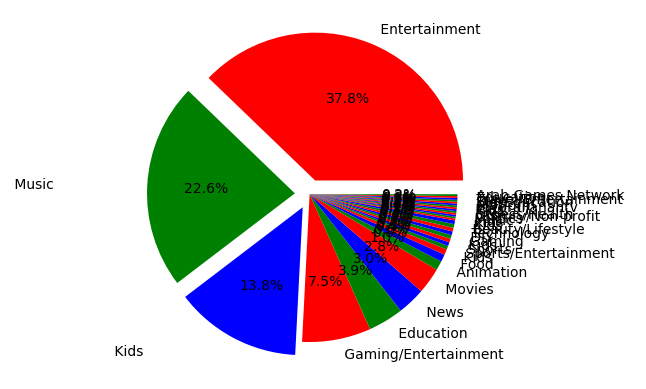

In [12]:
numbers_df = df['CATEGORY'].value_counts()
explode_array = np.zeros(32)
for i in range(3):
    explode_array[i] = 0.1
plt.pie(numbers_df, labels = numbers_df.index, colors = ['r', 'g', 'b'],
autopct = '%.1f%%', explode = explode_array)
plt.savefig("pie chart.png")
plt.show()

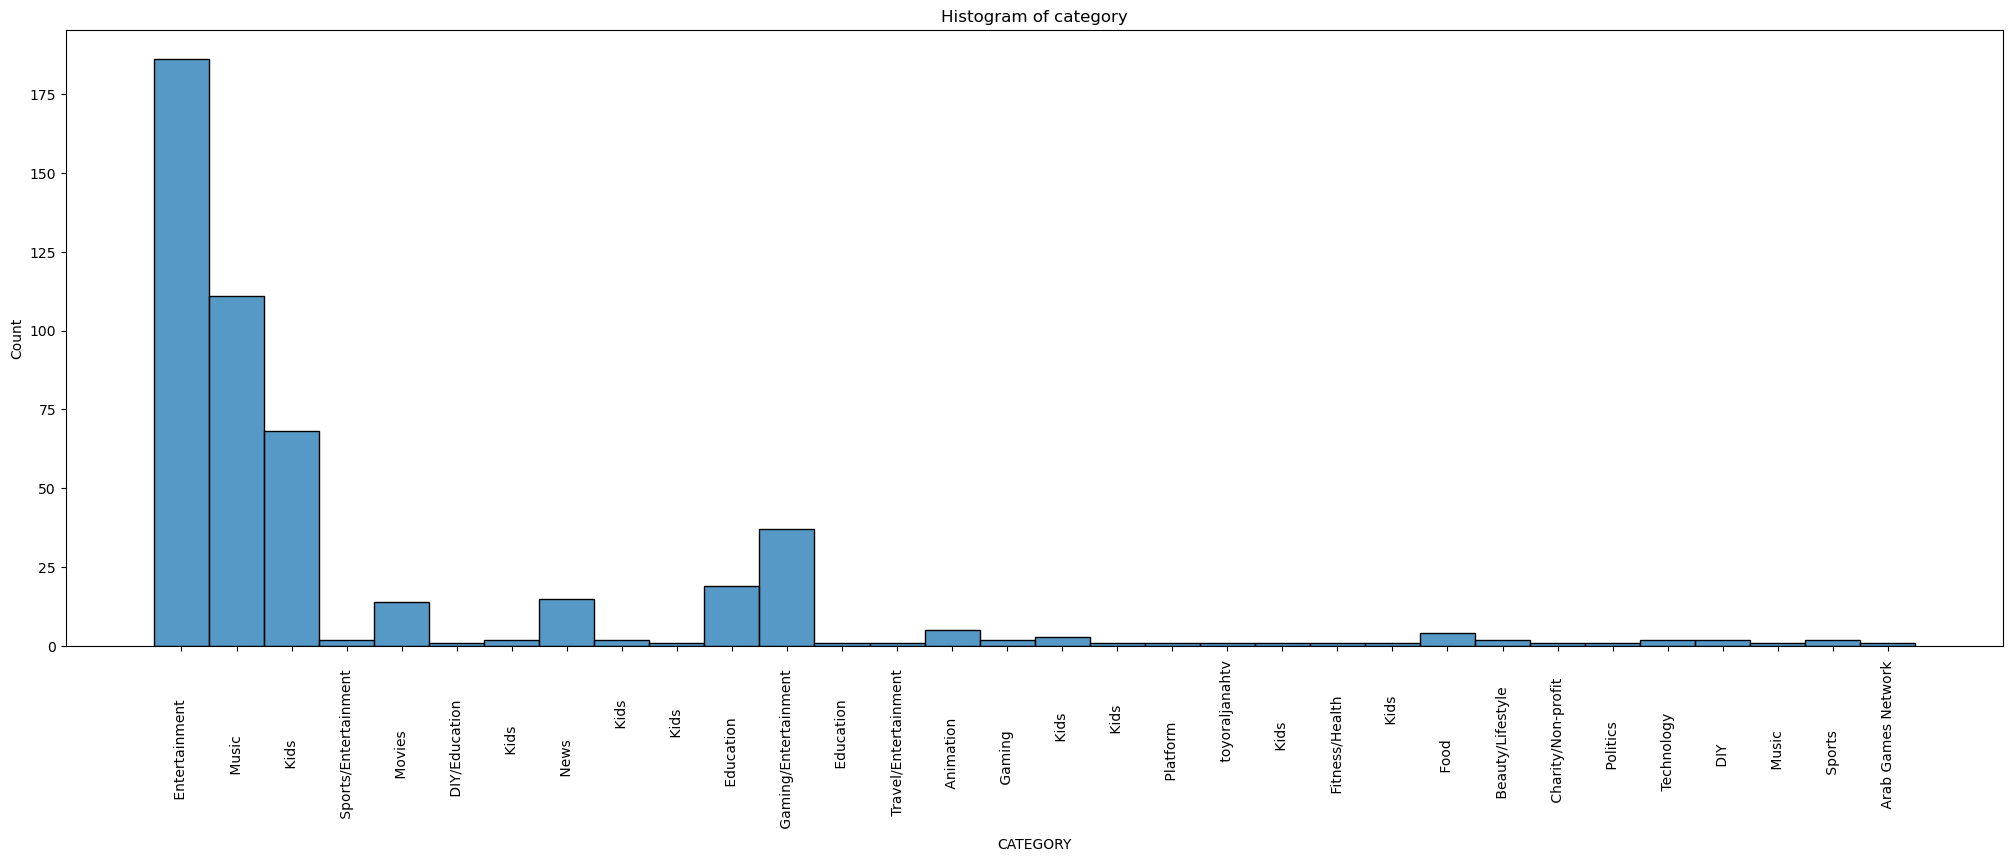

In [13]:
plt.figure(figsize = (25, 8))
sns.histplot(df, x = 'CATEGORY')
plt.title('Histogram of category')
plt.xticks(rotation = 90)
plt.savefig("Histogram of category")
plt.show()

In [14]:
cat = df.groupby('CATEGORY')['SUBSCRIBERS'].sum().reset_index().sort_values('SUBSCRIBERS', ascending = False)
cat.head(10)

,CATEGORY,SUBSCRIBERS
21,Movies,97.2M61.4M53.5M40.1M33.3M32.6M31.5M30.5M27.1M2...
5,DIY/Education,80.7M
19,Kids,75.3M26M
24,News,65.2M43.8M41.9M35.9M29.8M28.3M28M25.6M23.9M23....
14,Kids,56.9M29.1M
16,Kids,56.8M
7,Education,53.4M45.8M45M41M39.9M31.9M29.3M28.7M25.6M24.5M...
12,Gaming/Entertainment,50.5M50.2M49.5M47.6M44.1M44M42.3M41M40.4M39.8M...
6,Education,49.4M
30,Travel/Entertainment,43M


In [15]:
df.isna().sum()
df = df.fillna('X')
df.isna().sum()
df = df[df['NAME_OF_CHANNEL'] != 'X']
df = df[df['CATEGORY'] != 'X']
df.shape

(485, 6)

In [16]:
def convert_to_number(s):
    if isinstance(s, (int, float)):
        return s
    if 'K' in s:
        return float(s.replace('K', '')) * 1000
    elif 'M' in s:
        return float(s.replace('M', '')) * 1000000
    elif 'B' in s:
        return float(s.replace('B', '')) * 1000000000
    else:
        return float(s)

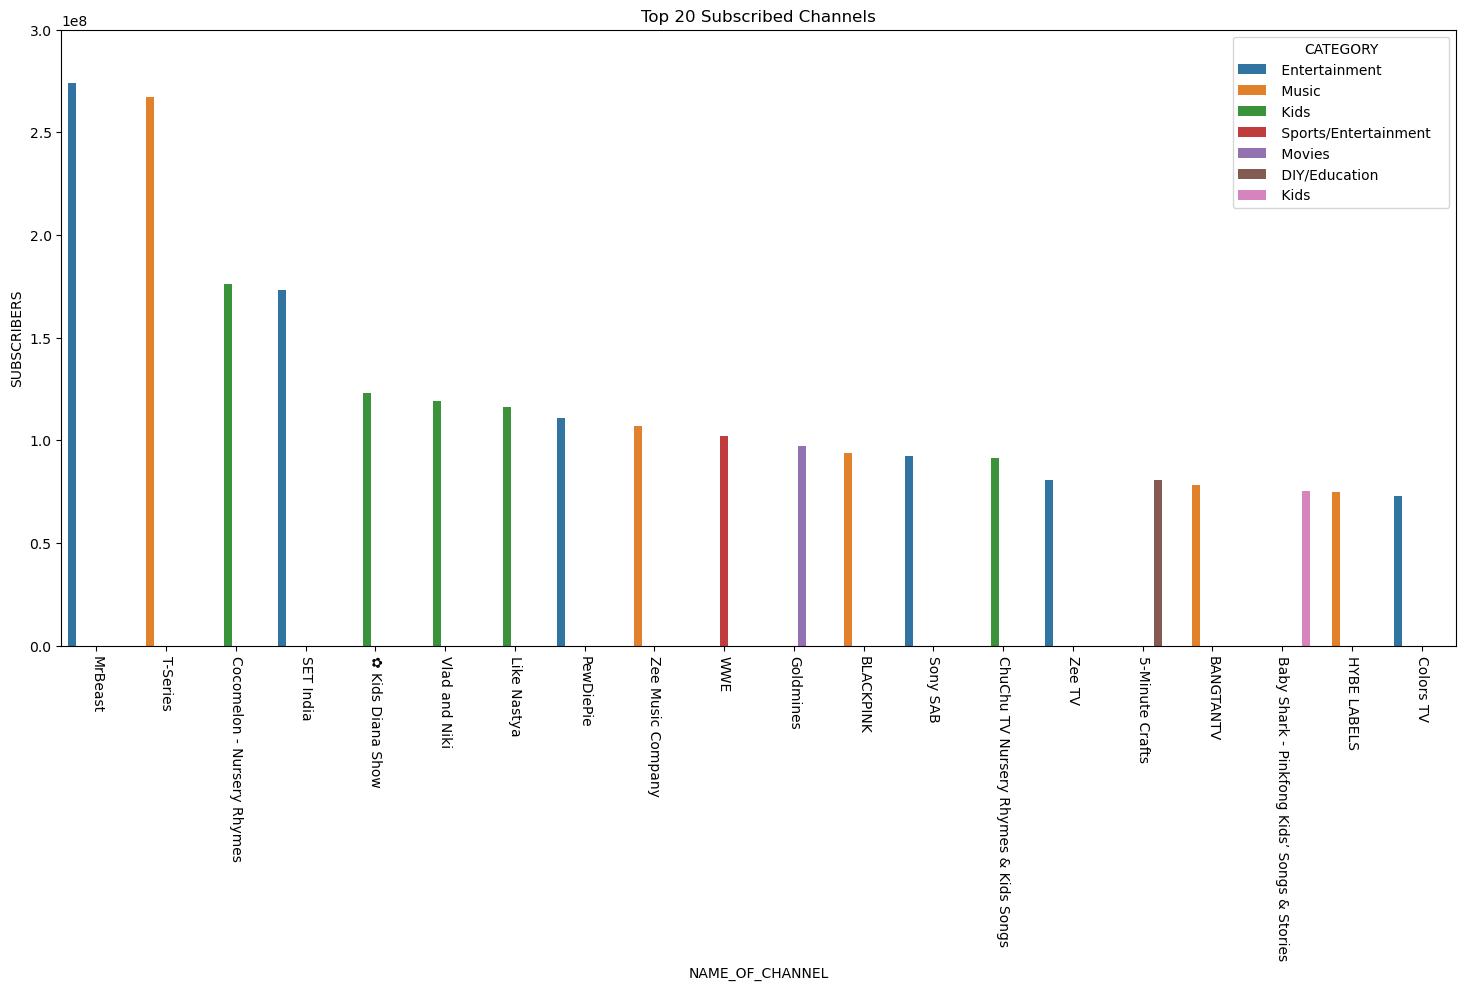

In [17]:
df['TOTAL_NUMBER_OF_VIDEOS'] = df['TOTAL_NUMBER_OF_VIDEOS'].apply(convert_to_number)
df['SUBSCRIBERS'] = df['SUBSCRIBERS'].apply(convert_to_number)
df['VIEWS'] = df['VIEWS'].apply(convert_to_number)

subs_df = df.sort_values('SUBSCRIBERS', ascending = False)
subs_df = subs_df[['NAME_OF_CHANNEL', 'SUBSCRIBERS', 'CATEGORY']].head(20)
plt.figure(figsize = (18, 8))
sns.barplot(subs_df, x = 'NAME_OF_CHANNEL', y = 'SUBSCRIBERS', hue = 'CATEGORY')
plt.xticks(rotation = -90)
plt.ylim(0, 3.0 * 1e8)
plt.title('Top 20 Subscribed Channels')
plt.savefig("Top 20 Subscribed Channels.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


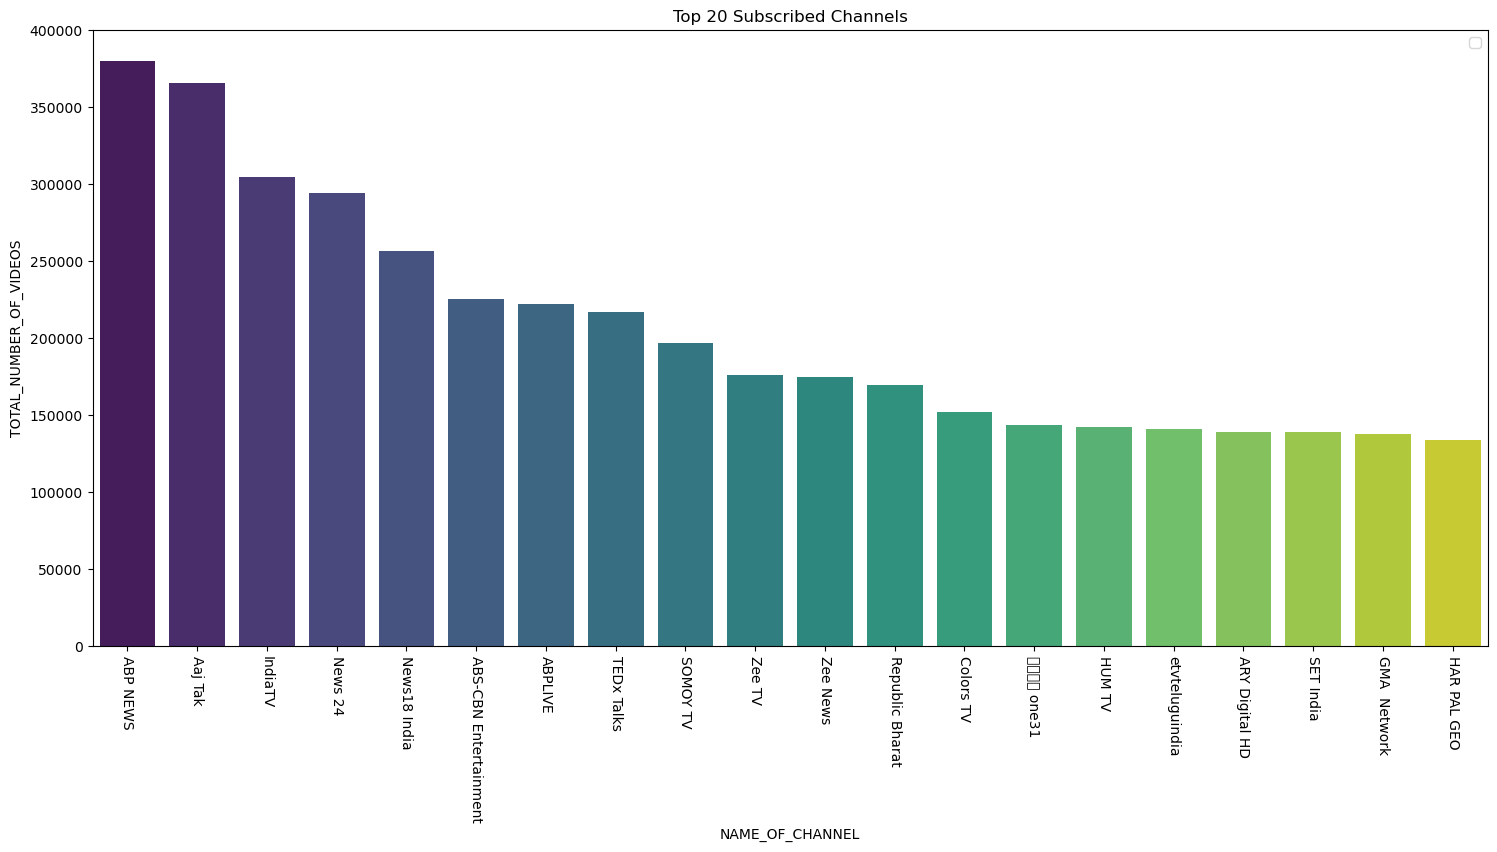

In [18]:
vids_df = df.sort_values('TOTAL_NUMBER_OF_VIDEOS', ascending = False)
vids_df = vids_df[['NAME_OF_CHANNEL', 'TOTAL_NUMBER_OF_VIDEOS', 'CATEGORY']].head(20)

plt.figure(figsize = (18, 8))
sns.barplot(vids_df, x = 'NAME_OF_CHANNEL', y = 'TOTAL_NUMBER_OF_VIDEOS', palette = 'viridis')
plt.xticks(rotation = -90)
plt.title('Top 20 Subscribed Channels')
plt.legend(loc = 'upper right')
plt.ylim(0, 400000)
plt.savefig("Top 20 Subscribed Channels.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


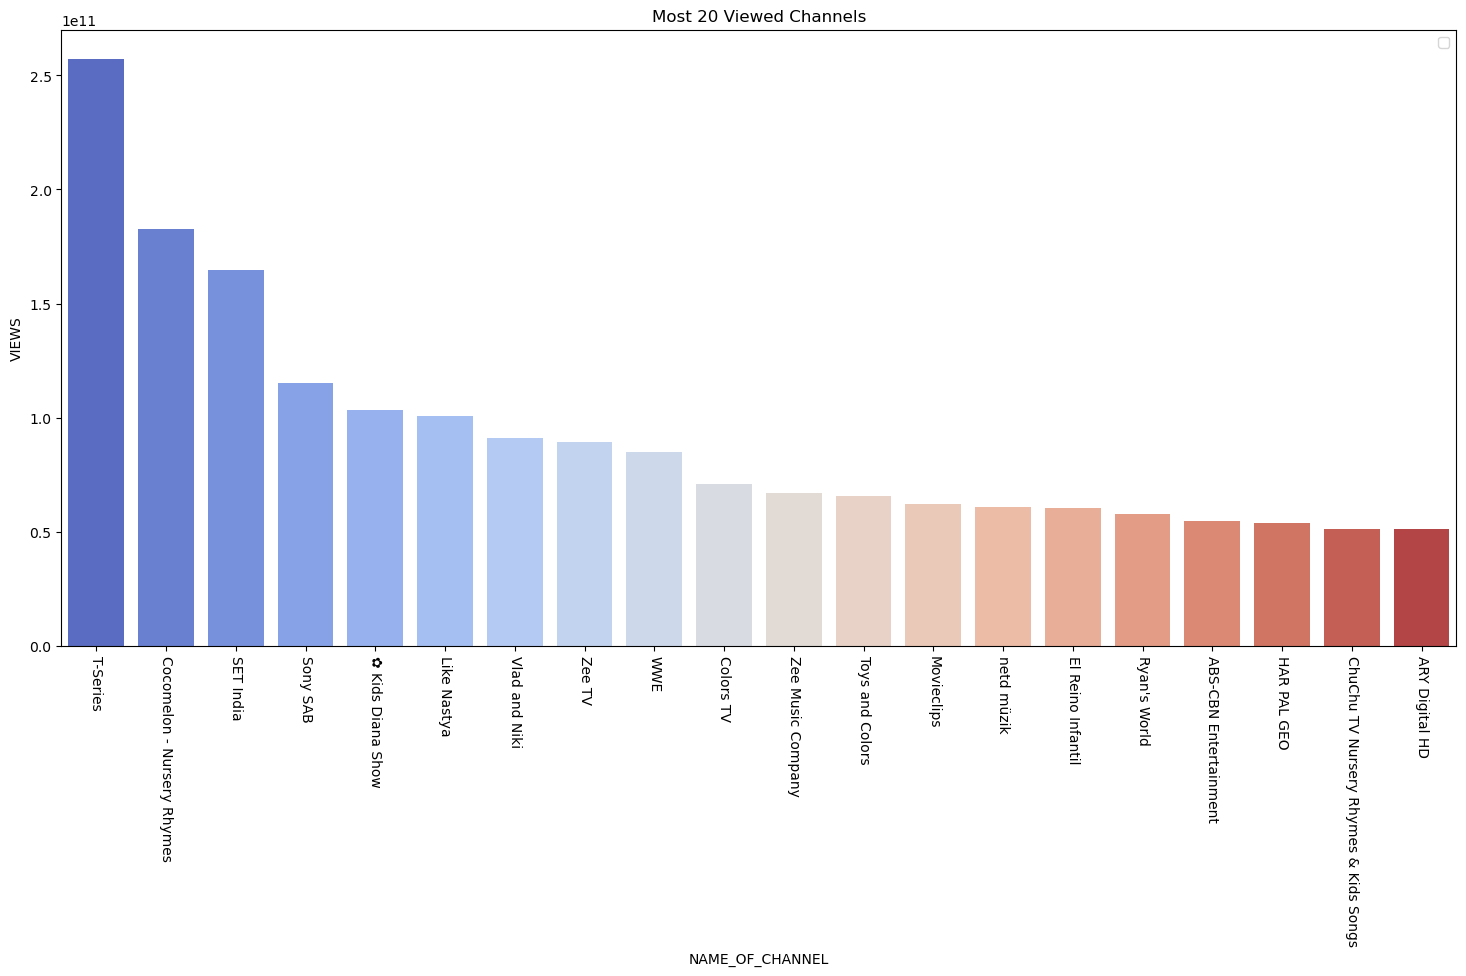

In [19]:
views_df = df.sort_values('VIEWS', ascending = False)
views_df = views_df[['NAME_OF_CHANNEL', 'VIEWS', 'CATEGORY']].head(20)

plt.figure(figsize = (18, 8))
sns.barplot(views_df, x = 'NAME_OF_CHANNEL', y = 'VIEWS', palette = 'coolwarm')
plt.xticks(rotation = -90)
plt.title('Most 20 Viewed Channels')
plt.legend(loc = 'upper right')
plt.savefig("Most 20 Viewed Channels.png")
plt.show()

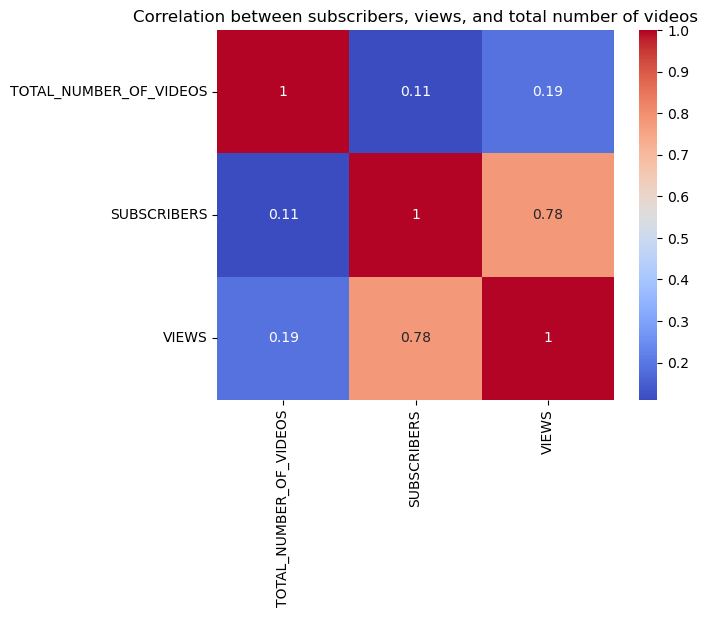

In [20]:
numeric_columns = ['TOTAL_NUMBER_OF_VIDEOS', 'SUBSCRIBERS', 'VIEWS']
corr_mat = df[numeric_columns].corr()
sns.heatmap(corr_mat, cmap = 'coolwarm', annot = True)
plt.title('Correlation between subscribers, views, and total number of videos')
plt.savefig("Correlation between subscribers, views, and total number of videos.png")
plt.show()

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(df, x = 'SUBSCRIBERS', y = 'VIEWS', hue = 'CATEGORY', alpha = 0.7, 
                 size = 'TOTAL_NUMBER_OF_VIDEOS', sizes = (100, 1000))
plt.title('Subscribers vs Views')
plt.legend(bbox_to_anchor = (1,1))
plt.savefig("Subscribers vs Views.png")
plt.show()